## Arundine

* Arundine, or 3,3-Diindolylmethane, is a natural compound formed in the stomach from its precursor Indol-3-carbinol in Brassicacea [Diindolylmethane (DIM) Information Resource Center, U Cali Berkeley](https://www.diindolylmethane-dim.com/), [Biersack 2020](https://www.cdrjournal.com/article/view/3692)
* neuroprotective action and BBB-permeability:
    * the MPTPp in-vivo mouse model of Parkinson's disease (para-phenyl–substituted diindolylmethane (C-DIM), [De Miranda et al 2013](https://jpet.aspetjournals.org/content/345/1/125), [De Miranda et al 2015](https://academic.oup.com/toxsci/article/143/2/360/1676838))
    * oxidative stress induced apoptosis in hippocampal neuronal cells ([Lee et al 2020](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7023184/))
    * primary hippocampal cell cultures exposed to ischemia ([Rzemieniec et al 2019](https://link.springer.com/article/10.1007/s10495-019-01522-2))
* antiinflammatory in fibroblasts from rheumatoid arthritis patients ([Du et al 2019](https://www.frontiersin.org/articles/10.3389/fimmu.2019.01620/full))
* targets in our drug-target network
    * [RGS4](https://www.genecards.org/cgi-bin/carddisp.pl?gene=RGS4): Regulator Of G Protein Signaling 4. Inhibits signal transduction by increasing the GTPase activity of G protein alpha subunits thereby driving them into their inactive GDP-bound form.
    * [GPR84](https://www.genecards.org/cgi-bin/carddisp.pl?gene=GPR84): G-Protein Coupled Receptor 84.  Receptor for medium-chain free fatty acid (FFA) with carbon chain lengths of C9 to C14. Capric acid (C10:0), undecanoic acid (C11:0) and lauric acid (C12:0) are the most potent agonists. Not activated by short-chain and long-chain saturated and unsaturated FFAs. Activation by medium-chain free fatty acid is coupled to a pertussis toxin sensitive G(i/o) protein pathway. May have important roles in processes from fatty acid metabolism to regulation of the immune system.
* other targets
    * [AHR](https://www.genecards.org/cgi-bin/carddisp.pl?gene=AHR): aryl hydrocarbon receptor: selective aryl hydrocarbon receptor modulator.  Ligand-activated transcription factor that enables cells to adapt to changing conditions by sensing compounds from the environment, diet, microbiome and cellular metabolism, and which plays important roles in development, immunity and cancer (PubMed:30373764, 23275542, 7961644, 32818467). ChEMBL evidence from mouse (Kd 90 nM) and human (missing activity data) studies
* multiple suggested molecular mechanisms relevant to Alzheimer's disease
    * AHR and histone deacylase dependent apoptosis and autophagy (neuroprotective effect [Rzemieniec et al 2019](https://link.springer.com/article/10.1007/s10495-019-01522-2))
    * activates TrkB/Akt signal pathway and thus promotes BDNF and antioxidant enzyme formation (neuroprotective effect [Lee et al 2020](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7023184/))
    * inhibits MAPK and AKT/mTOR pathway an prevents TNF-alfa induced proinflammatory factors ([Du et al 2019](https://www.frontiersin.org/articles/10.3389/fimmu.2019.01620/full))
* clinical trials ([ChEMBL](https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL446452/))
    * cervical cancer (phase 3)
    * breast cancer (phase 2)
    * prostate adenocarcinoma (phase 1)
* other indications
    * gastrointestinal cancer ([Kim 2016](https://www.mdpi.com/1422-0067/17/7/1155))

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from toolbox import wrappers
from toolbox import network_utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import attila_utils
import repos_tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
GenRev not found, steiner wont work
Import error: Negex. Using keyword matching instead
Import error: Funcassociate. Make sure that funcassociate is in toolbox!


Gene-gene network

In [2]:
network_cheng = wrappers.get_network('../../resources/PPI/Cheng2019/network.sif', only_lcc = True)
ggn = network_cheng # gene-gene network

ID converters from Entrez

In [3]:
fpath = '../../resources/hgnc/hgnc_complete_set.txt'
hgnc = pd.read_csv(fpath, sep='\t', usecols=['uniprot_ids', 'symbol', 'entrez_id'], dtype={'entrez_id': str}).dropna()
uniprot2ids = hgnc.set_index('uniprot_ids')
symbol2ids = hgnc.set_index('symbol')
entrez2ids = hgnc.set_index('entrez_id')

Gene sets

In [4]:
def convert_filter(l, x2ids=symbol2ids, convert=True, remove_not_in_ggn=True):
    def extracter(u):
        try:
            val = x2ids.loc[u, 'entrez_id']
        except KeyError:
            val = None
        return(val)
    val = [extracter(u) if convert else u for u in l
           if (not remove_not_in_ggn) or (extracter(u) in ggn.nodes)]
    return(val)

def read_gset(name='knowledge', convert=True, fpath='../../results/2021-12-02-proximity-various-ADgenesets/merged-proximity-chembl.xlsx'):
    l = pd.read_excel(fpath, sheet_name=name, header=None).iloc[:, 0].to_list()
    l = convert_filter(l, x2ids=symbol2ids, convert=convert, remove_not_in_ggn=True)
    return(l)

In [5]:
gset_names = ['knowledge', 'TWAS2+', 'agora2+', 'AD DE APOE3-APOE3', 'AD DE APOE4-APOE4', 'APOE3-4 DE neuron', 'APOE3-4 DE astrocyte', 'APOE3-4 DE microglia']
gsets = pd.DataFrame({k: [read_gset(gs, convert=v) for gs in gset_names] for k, v in {'symbol': False, 'entrez_id': True}.items()}, index=gset_names)
gsets['combined'] = gsets.apply(lambda s: dict(zip(s.symbol, s.entrez_id)), axis=1)
gsets

,symbol,entrez_id,combined
knowledge,"[A2M, ABCA7, ADAM10, APCS, APOE, APP, CLU, CST...","[2, 10347, 102, 325, 348, 351, 1191, 1471, 150...","{'A2M': '2', 'ABCA7': '10347', 'ADAM10': '102'..."
TWAS2+,"[ABCA7, ACE, APOC1, APOC2, APOC4, APOE, BCAM, ...","[10347, 1636, 341, 344, 346, 348, 4059, 602, 2...","{'ABCA7': '10347', 'ACE': '1636', 'APOC1': '34..."
agora2+,"[ACE, AP2B1, ATP1B1, ATP2A2, ATP2B1, ATP6V1A, ...","[1636, 163, 481, 488, 490, 523, 274, 1192, 119...","{'ACE': '1636', 'AP2B1': '163', 'ATP1B1': '481..."
AD DE APOE3-APOE3,"[AAK1, ADD3, AEBP1, AGO2, AK5, AKAP11, ALKBH5,...","[22848, 120, 165, 27161, 26289, 11215, 54890, ...","{'AAK1': '22848', 'ADD3': '120', 'AEBP1': '165..."
AD DE APOE4-APOE4,"[ABCC12, ACER3, ACOT7, ADCYAP1, ADD3, AGO2, AG...","[94160, 55331, 11332, 116, 120, 27161, 57085, ...","{'ABCC12': '94160', 'ACER3': '55331', 'ACOT7':..."
APOE3-4 DE neuron,"[ARNTL2, ATG4B, ATN1, BNC2, CACNA1C, CLIC1, CL...","[56938, 23192, 1822, 54796, 775, 1192, 9746, 2...","{'ARNTL2': '56938', 'ATG4B': '23192', 'ATN1': ..."
APOE3-4 DE astrocyte,"[ABCA5, ABCG1, ACADL, ADAM12, ADAMTSL3, AGTR1,...","[23461, 9619, 33, 8038, 57188, 185, 214, 27063...","{'ABCA5': '23461', 'ABCG1': '9619', 'ACADL': '..."
APOE3-4 DE microglia,"[ACP5, ACTC1, ADAM12, ADAMTS4, ADAMTS6, ALDOA,...","[54, 70, 8038, 9507, 11174, 226, 54443, 323, 9...","{'ACP5': '54', 'ACTC1': '70', 'ADAM12': '8038'..."


Selected top drugs from network proximity based screen

In [6]:
sel_drugs = {'Arundine': 'CHEMBL446452',
            'Chenodiol': 'CHEMBL240597',
            'Cysteamine': 'CHEMBL602',
            'Cysteamine hydrochloride': 'CHEMBL1256137'}

Drug-target network.  Note that Q9NQS5/GPR84, a target of Arundine, is not in the gene-gene network.

In [7]:
fpath = '../../results/2021-10-24-chembl-query/chembl-avg_p_activities-phase_3_4-avg_p_act_5plus.csv'
dtn = pd.read_csv(fpath).groupby('drug_chembl_id').apply(lambda x: x.target_uniprot_ac.to_list())
dtn_sel = dtn.loc[sel_drugs.values()].to_frame('uniprot_ac')
dtn_sel = pd.concat([dtn_sel.index.to_frame(), dtn_sel], axis=1)
dtn_sel = dtn_sel.rename({v: k for k, v in sel_drugs.items()}, axis=0)

def add_id(ID='symbol', remove_not_in_ggn=False):
#Translate uniprot_ac to ID type; possibly remove gene if not in gene-gene network
    def helper(l):
        val = [uniprot2ids.loc[u, ID] for u in l if (not remove_not_in_ggn) or (uniprot2ids.loc[u, 'entrez_id'] in ggn.nodes)]
        return(val)
    return(dtn_sel.uniprot_ac.apply(helper))

dtn_sel['symbol'] = add_id('symbol', remove_not_in_ggn=False)
dtn_sel['entrez_id'] = add_id('entrez_id', remove_not_in_ggn=False)
dtn_sel['symbol_ggn'] = add_id('symbol', remove_not_in_ggn=True)
dtn_sel['entrez_id_ggn'] = add_id('entrez_id', remove_not_in_ggn=True)
dtn_sel

,drug_chembl_id,uniprot_ac,symbol,entrez_id,symbol_ggn,entrez_id_ggn
drug_chembl_id,,,,,,
Arundine,CHEMBL446452,"[P49798, Q9NQS5]","[RGS4, GPR84]","[5999, 53831]",[RGS4],[5999]
Chenodiol,CHEMBL240597,"[P49798, Q12908]","[RGS4, SLC10A2]","[5999, 6555]","[RGS4, SLC10A2]","[5999, 6555]"
Cysteamine,CHEMBL602,"[P08684, P49798]","[CYP3A4, RGS4]","[1576, 5999]","[CYP3A4, RGS4]","[1576, 5999]"
Cysteamine hydrochloride,CHEMBL1256137,"[O75496, P02545, P53350, P54132, Q16236, Q9NUW8]","[GMNN, LMNA, PLK1, BLM, NFE2L2, TDP1]","[51053, 4000, 5347, 641, 4780, 55775]","[GMNN, LMNA, PLK1, BLM, NFE2L2, TDP1]","[51053, 4000, 5347, 641, 4780, 55775]"


## Results

In [8]:
target_id = dtn_sel.loc['Arundine', 'entrez_id_ggn'][0]
def get_shortest_path_lengths_target(gs, target_id):
    d = {symbol: network_utilities.get_shortest_path_length_between(ggn, entrez_id, target_id) for symbol, entrez_id in gsets.loc[gs, 'combined'].items()}
    return(d)

def get_shortest_path_lengths(drug):
    targets = dtn_sel.loc[drug, 'entrez_id_ggn']
    l = [[get_shortest_path_lengths_target(gs, t) for t in targets] for gs in gset_names]
    columns = pd.MultiIndex.from_product([[drug], dtn_sel.loc[drug, 'symbol_ggn']])
    df = pd.DataFrame(l, columns=columns, index=gset_names)
    return(df)

path_lengths = pd.concat([get_shortest_path_lengths(drug) for drug in dtn_sel.index], axis=1)
path_lengths

Arundine  \
                                                                   RGS4   
knowledge             {'A2M': 3, 'ABCA7': 3, 'ADAM10': 3, 'APCS': 3,...   
TWAS2+                {'ABCA7': 3, 'ACE': 3, 'APOC1': 3, 'APOC2': 3,...   
agora2+               {'ACE': 3, 'AP2B1': 2, 'ATP1B1': 2, 'ATP2A2': ...   
AD DE APOE3-APOE3     {'AAK1': 3, 'ADD3': 3, 'AEBP1': 3, 'AGO2': 2, ...   
AD DE APOE4-APOE4     {'ABCC12': 4, 'ACER3': 4, 'ACOT7': 3, 'ADCYAP1...   
APOE3-4 DE neuron     {'ARNTL2': 3, 'ATG4B': 3, 'ATN1': 3, 'BNC2': 3...   
APOE3-4 DE astrocyte  {'ABCA5': 4, 'ABCG1': 3, 'ACADL': 3, 'ADAM12':...   
APOE3-4 DE microglia  {'ACP5': 3, 'ACTC1': 3, 'ADAM12': 3, 'ADAMTS4'...   

                                                              Chenodiol  \
                                                                   RGS4   
knowledge             {'A2M': 3, 'ABCA7': 3, 'ADAM10': 3, 'APCS': 3,...   
TWAS2+                {'ABCA7': 3, 'ACE': 3, 'APOC1': 3, 'APOC2': 3,...   
agora2+               {'ACE': 3, 'AP2B1': 2, 'ATP1B1': 2, 'ATP2A2': ...   
AD DE APOE3-APOE3     {'AAK1': 3, 'ADD3': 3, 'AEBP1': 3, 'AGO2': 2, ...   
AD DE APOE4-APOE4     {'ABCC12': 4, 'ACER3': 4, 'ACOT7': 3, 'ADCYAP1...   
APOE3-4 DE neuron     {'ARNTL2': 3, 'ATG4B': 3, 'ATN1': 3, 'BNC2': 3...   
APOE3-4 DE astrocyte  {'ABCA5': 4, 'ABCG1': 3, 'ACADL': 3, 'ADAM12':...   
APOE3-4 DE microglia  {'ACP5': 3, 'ACTC1': 3, 'ADAM12': 3, 'ADAMTS4'...   

                                                                         \
                                                                SLC10A2   
knowledge             {'A2M': 3, 'ABCA7': 2, 'ADAM10': 2, 'APCS': 3,...   
TWAS2+                {'ABCA7': 2, 'ACE': 2, 'APOC1': 3, 'APOC2': 3,...   
agora2+               {'ACE': 2, 'AP2B1': 2, 'ATP1B1': 2, 'ATP2A2': ...   
AD DE APOE3-APOE3     {'AAK1': 3, 'ADD3': 2, 'AEBP1': 3, 'AGO2': 2, ...   
AD DE APOE4-APOE4     {'ABCC12': 3, 'ACER3': 3, 'ACOT7': 2, 'ADCYAP1...   
APOE3-4 DE neuron     {'ARNTL2': 2, 'ATG4B': 2, 'ATN1': 2, 'BNC2': 3...   
APOE3-4 DE astrocyte  {'ABCA5': 3, 'ABCG1': 2, 'ACADL': 2, 'ADAM12':...   
APOE3-4 DE microglia  {'ACP5': 2, 'ACTC1': 2, 'ADAM12': 3, 'ADAMTS4'...   

                                                             Cysteamine  \
                                                                 CYP3A4   
knowledge             {'A2M': 3, 'ABCA7': 2, 'ADAM10': 2, 'APCS': 2,...   
TWAS2+                {'ABCA7': 2, 'ACE': 2, 'APOC1': 3, 'APOC2': 3,...   
agora2+               {'ACE': 2, 'AP2B1': 2, 'ATP1B1': 2, 'ATP2A2': ...   
AD DE APOE3-APOE3     {'AAK1': 3, 'ADD3': 2, 'AEBP1': 3, 'AGO2': 2, ...   
AD DE APOE4-APOE4     {'ABCC12': 3, 'ACER3': 3, 'ACOT7': 2, 'ADCYAP1...   
APOE3-4 DE neuron     {'ARNTL2': 2, 'ATG4B': 2, 'ATN1': 2, 'BNC2': 3...   
APOE3-4 DE astrocyte  {'ABCA5': 3, 'ABCG1': 2, 'ACADL': 2, 'ADAM12':...   
APOE3-4 DE microglia  {'ACP5': 2, 'ACTC1': 2, 'ADAM12': 3, 'ADAMTS4'...   

                                                                         \
                                                                   RGS4   
knowledge             {'A2M': 3, 'ABCA7': 3, 'ADAM10': 3, 'APCS': 3,...   
TWAS2+                {'ABCA7': 3, 'ACE': 3, 'APOC1': 3, 'APOC2': 3,...   
agora2+               {'ACE': 3, 'AP2B1': 2, 'ATP1B1': 2, 'ATP2A2': ...   
AD DE APOE3-APOE3     {'AAK1': 3, 'ADD3': 3, 'AEBP1': 3, 'AGO2': 2, ...   
AD DE APOE4-APOE4     {'ABCC12': 4, 'ACER3': 4, 'ACOT7': 3, 'ADCYAP1...   
APOE3-4 DE neuron     {'ARNTL2': 3, 'ATG4B': 3, 'ATN1': 3, 'BNC2': 3...   
APOE3-4 DE astrocyte  {'ABCA5': 4, 'ABCG1': 3, 'ACADL': 3, 'ADAM12':...   
APOE3-4 DE microglia  {'ACP5': 3, 'ACTC1': 3, 'ADAM12': 3, 'ADAMTS4'...   

                                               Cysteamine hydrochloride  \
                                                                   GMNN   
knowledge             {'A2M': 2, 'ABCA7': 2, 'ADAM10': 2, 'APCS': 3,...   
TWAS2+                {'ABCA7': 2, 'ACE': 2, 'APOC1': 3, 'APOC2': 3,...   
agora2+ 

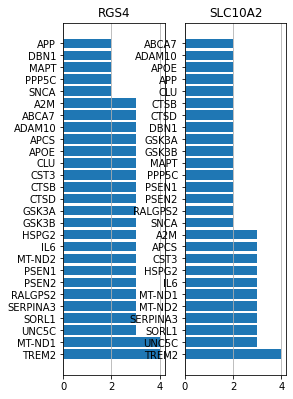

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(4, 6 * len(gsets.loc['knowledge', 'symbol']) / 25))
def path_barh(ax, gset='knowledge', drug='Arundine'):
    y = np.arange(start=len(gsets.loc[gset, 'symbol']), stop=0, step=-1) - 1
    df = path_lengths.xs(drug, level=0, axis=1)
    for axi, target in zip(ax, df.columns):
        pathlen = df.loc[gset, target].values()
        data = pd.DataFrame({'symbol': gsets.loc[gset, 'symbol'], 'path length': pathlen})
        data = data.sort_values(['path length', 'symbol'])
        data['y'] = np.arange(start=len(gsets.loc[gset, 'symbol']), stop=0, step=-1) - 1
        axi.barh(y='y', width='path length', data=data)
        axi.set_yticks(data['y'])
        axi.set_yticklabels(data.symbol)
        axi.grid(axis='x')
        axi.set_title(target)
    return(ax)

ax = path_barh(ax, drug='Chenodiol')

In [10]:
%connect_info

{
  "shell_port": 53587,
  "iopub_port": 53588,
  "stdin_port": 53589,
  "control_port": 53591,
  "hb_port": 53590,
  "ip": "127.0.0.1",
  "key": "9ffca52b-c5ddd3abff32c2e421069224",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-d8b51d80-9632-4237-ab44-8ab5c17a6075.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
